### Завдання
Застосуйте описані вище методи кластеризації на датасеті винних сортів UCI ML Wine Data Set.

Завантажити його можна командою datasets.load_wine. Результати кластеризацій оформіть у вигляді файлу ipynb.

In [261]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [262]:
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram

### Loading and understanding data

In [263]:
wine_df =  datasets.load_wine()

In [264]:
df  = pd.DataFrame(wine_df.data)
df.columns = wine_df['feature_names']
df.rename(columns={'od280/od315_of_diluted_wines': 'od_diluted_wines'}, inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### K-means clustering

In [265]:
model = KMeans(n_clusters=4)

In [266]:
model.fit(wine_df.data)

KMeans(n_clusters=4)

In [267]:
predictions = model.predict(wine_df.data)

In [268]:
print(predictions)

[3 3 3 1 0 1 1 1 3 3 1 1 1 3 1 1 1 3 1 0 0 0 3 3 0 0 3 1 3 3 1 1 3 1 3 3 3
 3 3 0 0 3 3 0 3 3 3 3 3 1 3 1 3 1 3 3 3 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 3
 3 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 3 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 0 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 3 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [269]:
cluster_0 = wine_df.data[predictions == 0]
cluster_1 = wine_df.data[predictions == 1]
cluster_2 = wine_df.data[predictions == 2]
cluster_3 = wine_df.data[predictions == 3]

cluster_3.shape

(34, 13)

In [270]:
feat_names = df.columns
print('Column`s indeces:')
pd.Series(feat_names)


Column`s indeces:


0                  alcohol
1               malic_acid
2                      ash
3        alcalinity_of_ash
4                magnesium
5            total_phenols
6               flavanoids
7     nonflavanoid_phenols
8          proanthocyanins
9          color_intensity
10                     hue
11        od_diluted_wines
12                 proline
dtype: object

In [271]:
# column`s indeces
x = 6 
y = 9 
z = 12 

Text(0.5, 0, 'proline')

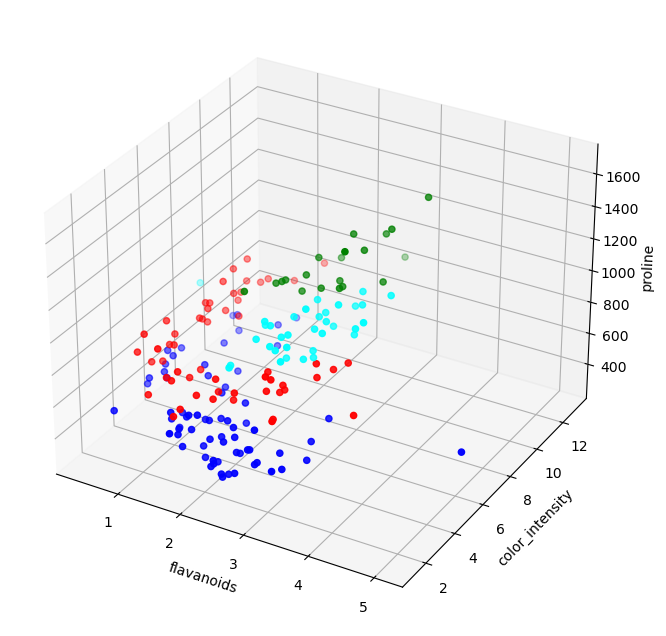

In [272]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_0[:,x],cluster_0[:,y], cluster_0[:,z], color = 'red')
ax.scatter(cluster_1[:,x],cluster_1[:,y], cluster_1[:,z], color = 'green')
ax.scatter(cluster_2[:,x],cluster_2[:,y], cluster_2[:,z], color = 'blue')
ax.scatter(cluster_3[:,x],cluster_3[:,y], cluster_3[:,z], color = 'cyan')
ax.set_xlabel(feat_names[x])
ax.set_ylabel(feat_names[y])
ax.set_zlabel(feat_names[z])

### Density-Based Spatial Clustering of Applications with Noise

In [273]:
dbscan = DBSCAN(eps=40, min_samples=4)

In [274]:
dbscan.fit(wine_df.data)

DBSCAN(eps=40, min_samples=4)

In [275]:
pca = PCA(n_components=2).fit(wine_df.data)
pca_2d = pca.transform(wine_df.data)

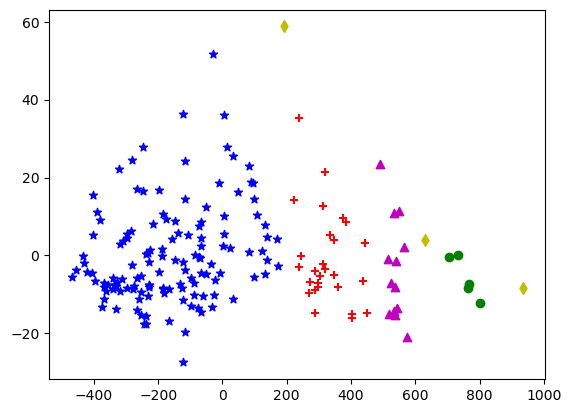

In [276]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')
    elif dbscan.labels_[i] == 3:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='m', marker='^')

### Hierarchical clustering

In [277]:
mergings = linkage(wine_df.data, method = 'centroid')

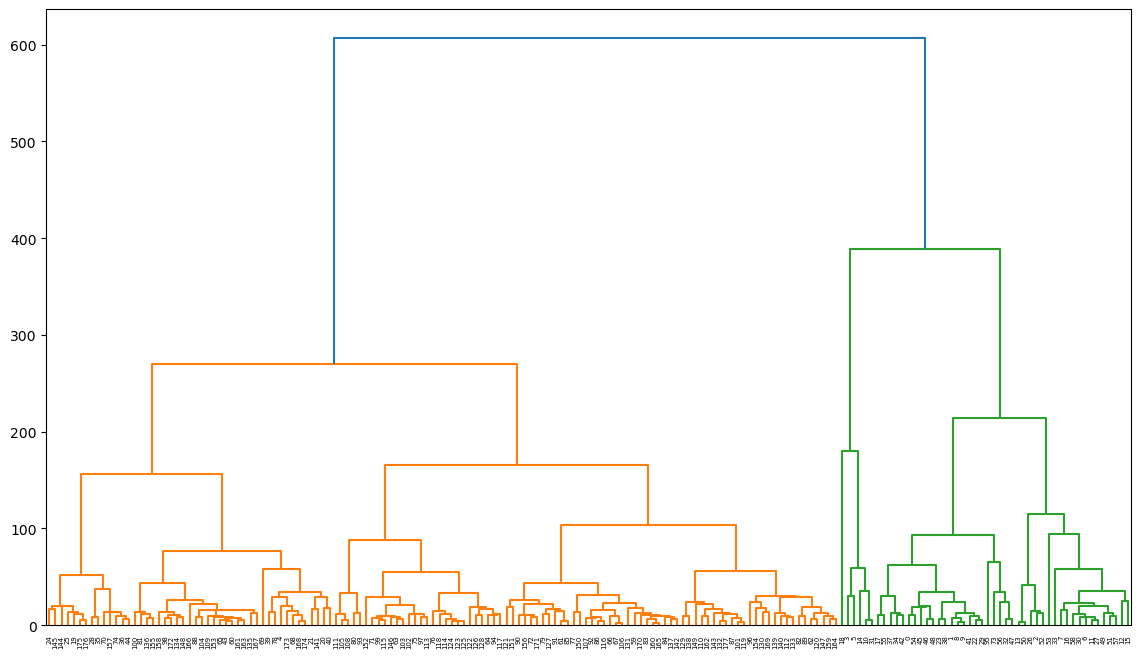

In [278]:
fig = plt.figure(figsize=(14, 8))
clusters = dendrogram(mergings,leaf_rotation=90)

###  Висновок:
### За допомогою методів К-середніх та DBSCAN вдалося виділити по 4 кластери даних. На 3-му рівні ієрархичного дерева також можна спостерігати розгалудження на 4 основних кластери.
### Але взагалі дані кластеризуються не дуже добре. Виділені кластери перетинаються і змішуються між собою. 
